In [65]:
import matplotlib.pyplot as plt  
import numpy as np

BASE_PATH = "/Volumes/externo/gsgp-mo/results/"
OUTPUT_PATH = "/Volumes/externo/assets"
STRATEGIES = ['random', 'kmeans', 'kernel']
STRATEGIES_TITLES = ['Random', 'K-Means', 'Kernel K-Means']
K = range(2, 6)
#COLORS = ["#3F5D7D", "green", "orange"]
COLORS = ["#5F6CAF", "#FFB677", "#F0134D"]
STRATEGY_COLORS = ["#FE9801", "#F65C78", "#018383"]
DATASETS = ['bioavailability', 'ccn', 'ccun', 'concrete', 'energyCooling', 'energyHeating',
            'keijzer-7', 'parkinsons', 'towerData', 'vladislavleva-1', 'wineRed', 'wineWhite',
            'yacht']

def plot(dataset, benchmark, y_values, y_errors):
    f, ax = plt.subplots(1,1, sharey=True, figsize=(10,5)) 
    f.suptitle(dataset.upper(), fontsize=13)
    f.subplots_adjust(top=0.8, bottom=0.2)
        
    ax.plot(K, benchmark, color="gray", label="Single", linestyle='dashed')
    for i, (y, err) in enumerate(zip(y_values, y_errors)):     
        ax.spines["top"].set_visible(False)  
        ax.spines["right"].set_visible(False)      
        ax.get_yaxis().tick_left()  
        ax.get_xaxis().tick_bottom()  
        ax.set_xlabel('Number of Regions')
        ax.set_ylabel('Median Training RMSE')
        ax.set_xticks(K)  
        ax.set_xticklabels(K) 
        ax.plot(K, y, color=COLORS[i], label=STRATEGIES_TITLES[i], alpha=0.75, marker='o')    
    
        
    h, l = ax.get_legend_handles_labels()
    f.legend(h, l, loc='lower center', ncol=5, labelspacing=0. )        
        
    # Make the title big enough so it spans the entire plot, but don't make it  
    # so big that it requires two lines to show.  

    return f

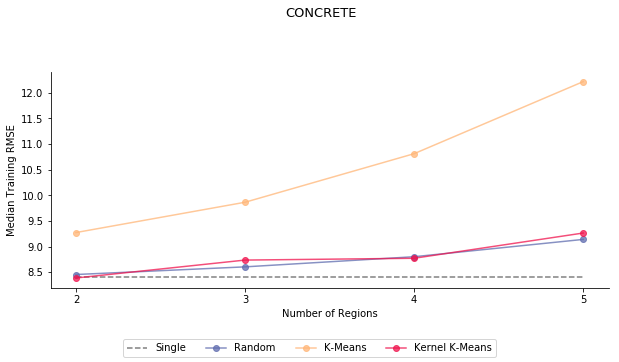

In [78]:
from scipy.stats import iqr

def plot_dataset_training(evol, dataset):
    benchmarks = np.loadtxt("%s/%s/%s/output-%s/tsFitness.csv" % (BASE_PATH, evol, "single", dataset), delimiter=',', unpack=True)[-1]
    benchmarks = np.repeat([np.median(benchmarks)], len(K))

    y_values = []
    y_errors = []
    for strategy in STRATEGIES:
        curr_values = []
        curr_errors = []

        for k in K:
            directory = "%s/%s/%s/%s/output-%s" % (BASE_PATH, evol, strategy, k, dataset)
            predicted = np.loadtxt("%s/ensemble_unweighted_fitness.csv" % (directory), delimiter=',', unpack=True)[-1],            
            curr_values.append(np.median(predicted))
            curr_errors.append(iqr(predicted))

        y_values.append(curr_values)
        y_errors.append(curr_values)

    return plot(dataset, benchmarks, np.array(y_values), np.array(y_errors))

plot_dataset_training("gp", "concrete")
plt.show()